In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
from glob import glob
import pandas as pd


In [80]:
# xspec
from astropy.cosmology import FlatLambdaCDM
import astropy.units as u

cosmo = FlatLambdaCDM(H0=70, Om0=0.3)

def norm_spex2xspec(reds, n_spex):
    DA = cosmo.angular_diameter_distance(reds).to_value(u.cm)
    n_spex = n_spex*1e64/1e6# m-3 to cm-3
    return 1e-14/(4*np.pi*(DA*(1+reds))**2)*n_spex

norm_spex2xspec(0.02251, 35000)

3.1797438164526412e-06

0 basic figure style

In [2]:
import matplotlib.pyplot as plt

def basic_figure_style():
    SMALL_SIZE = 5*4                                       
    MEDIUM_SIZE = 8*2
    BIGGER_SIZE = 10*4

    plt.rc('font', size=MEDIUM_SIZE, family='serif')          # controls default text sizes
    plt.rc('axes', titlesize=MEDIUM_SIZE)                     # fontsize of the axes title
    plt.rc('axes', labelsize=MEDIUM_SIZE)                    # fontsize of the x and y labels
    plt.rc('xtick', labelsize=MEDIUM_SIZE, direction='out')    # fontsize of the tick labels
    plt.rc('ytick', labelsize=MEDIUM_SIZE, direction='out')    # fontsize of the tick labels
    plt.rc('legend', fontsize=MEDIUM_SIZE)                    # legend fontsize
    plt.rc('figure', titlesize=BIGGER_SIZE)                  # fontsize of the figure title
    plt.rc('lines', linewidth=2) 
    plt.rc('axes', grid=True) #
    plt.rc('grid', alpha=0.7) #
    plt.rc('xtick', top=True)
    plt.rc('ytick', right=True)
    plt.rc('axes.formatter', use_mathtext=True, min_exponent=4, useoffset=False)
    plt.rc('figure', figsize='6, 6')                         # size of the figure, used to be '4, 3' in inches

    # Set LaTeX rendering to True
    plt.rc('text', usetex=False)

basic_figure_style()


In [3]:
# xspec
from astropy.cosmology import FlatLambdaCDM
import astropy.units as u

cosmo = FlatLambdaCDM(H0=70, Om0=0.3)

def norm_sp2xp(reds, n_spex):
    DA = cosmo.angular_diameter_distance(reds).to_value(u.cm)
    n_spex = n_spex*1e64/1e6# m-3 to cm-3
    return 1e-14/(4*np.pi*(DA*(1+reds))**2)*n_spex

# 1 plot Z 1T XSPEC vs SPEX

## plot Z vs T

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


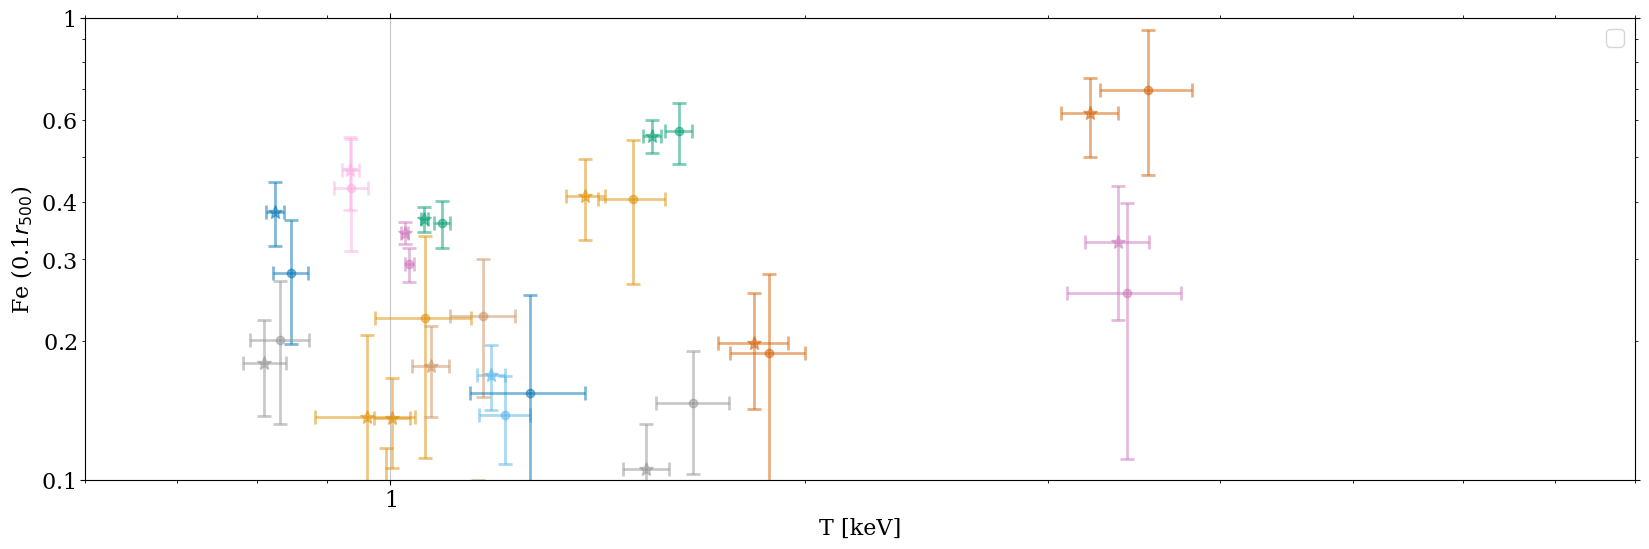

In [103]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

cb = sns.color_palette("colorblind").as_hex()
# set paths
rootdir = '/Users/eusracenorth/Documents/work/XGAP-ABUN/alldata'
savepath = f'{rootdir}/figs/T_distribution'
datapath = f'{rootdir}/dats'
os.makedirs(f'{savepath}', exist_ok=True)

# make plot
fig, ax = plt.subplots(figsize=(20, 6))

# load data
file_1T_xspec = f'{datapath}/R500-01_1T_xspec.csv'
file_1T_spex = f'{datapath}/R500-01_1T_spex.csv'
df_1T_xspec = pd.read_csv(file_1T_xspec)
df_1T_spex = pd.read_csv(file_1T_spex)

# filter xspec and spex
df_1T_spex = df_1T_spex[df_1T_spex['Z-value'] != 0]
df_1T_xspec = df_1T_xspec[df_1T_xspec['ID'].isin(df_1T_spex['ID'])]

# extract error values
yerrhi_xspec = np.where(df_1T_xspec['T-errhi'] < 5, df_1T_xspec['T-errhi'], 0)
xerrlo_xspec = np.where(df_1T_xspec['Z-errlo'] < 5, df_1T_xspec['Z-errlo'], 0)
xerrhi_xspec = np.where(df_1T_xspec['Z-errhi'] < 5, df_1T_xspec['Z-errhi'], 0)

yerrhi_spex = np.where(df_1T_spex['T-errhi'] < 5, df_1T_spex['T-errhi'], 0)
xerrlo_spex = np.where(df_1T_spex['Z-errlo'] < 5, df_1T_spex['Z-errlo'], 0)
xerrhi_spex = np.where(df_1T_spex['Z-errhi'] < 5, df_1T_spex['Z-errhi'], 0)

# plot data
for i in range(len(df_1T_spex)):
    # print(df_1T_xspec['T-value'].iloc[i])
    # print(xerrlo_xspec[i],df_1T_xspec['T-errlo'].iloc[i])
    plt.errorbar(
        df_1T_xspec['T-value'].iloc[i],
        df_1T_xspec['Z-value'].iloc[i],
        yerr=xerrlo_xspec[i],  # Fixing the xerr format
        xerr=df_1T_xspec['T-errlo'].iloc[i],
        capsize=5,
        capthick=2,
        fmt='o',
        alpha=0.5,
        c = cb[int(i%len(cb))]
    )

    plt.errorbar(
        df_1T_spex['T-value'].iloc[i],
        df_1T_spex['Z-value'].iloc[i],
        yerr=xerrlo_spex[i],  # Fixing the xerr format
        xerr=df_1T_spex['T-errlo'].iloc[i],
        capsize=5,
        capthick=2,
        fmt='*',
        markersize = 10,
        alpha=0.5,
        c = cb[int(i%len(cb))]
    )

plt.legend()
plt.xlim(0.6, 8)
plt.ylim(0.1, 1)

plt.xlabel('T [keV]')
plt.ylabel('Fe (0.1$r_{500}$)')

plt.xscale('log')
plt.yscale('log')

plt.savefig(f'{savepath}/your_plot_name.png')
plt.show()


1.1 constrast Z vs T

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


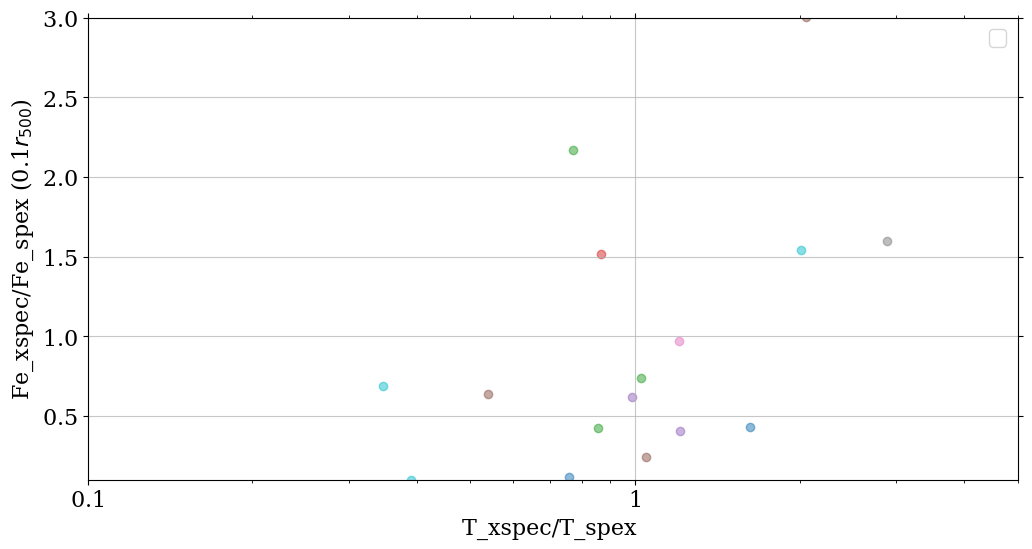

In [41]:
# read data
#### set paths ####
rootdir = f'/Users/eusracenorth/Documents/work/XGAP-ABUN/alldata'
savepath = f'{rootdir}/figs/T_distribution'
datapath = f'{rootdir}/dats'
os.makedirs(f'{savepath}', exist_ok=True)

# make plot
fig, ax = plt.subplots(figsize = (12,6))

#### load data ####
file_1T_xspec = f'{datapath}/R500-01_1T_xspec.csv'
file_1T_spex = f'{datapath}/R500-01_1T_spex.csv'
df_1T_xspec = pd.read_csv(file_1T_xspec)
df_1T_spex = pd.read_csv(file_1T_spex)



yerrhi_xp = np.where(df_1T_xspec['T-errhi']<5, df_1T_xspec['T-errhi'], 0)
xerrlo_xp = np.where(df_1T_xspec['Z-errlo']<5, df_1T_xspec['Z-errlo'], 0)
xerrhi_xp = np.where(df_1T_xspec['Z-errhi']<5, df_1T_xspec['Z-errhi'], 0)
# plt.errorbar(df_1T_xspec['T-value'], df_1T_xspec['Z-value'],  xerr = (xerrlo, xerrhi), yerr = (df_1T_xspec['T-errlo'], yerrhi), label = '1T-xspec', capsize=5, capthick=2,fmt = 'o', alpha = 0.5)

x = np.arange(len(df_1T_spex))
yerrhi_sp = np.where(df_1T_spex['T-errhi']<5, df_1T_spex['T-errhi'], 0)
xerrlo_sp = np.where(df_1T_spex['Z-errlo']<5, df_1T_spex['Z-errlo'], 0)
xerrhi_sp = np.where(df_1T_spex['Z-errhi']<5, df_1T_spex['Z-errhi'], 0)
for id in df_1T_xspec['ID']:
    fil_xp = df_1T_xspec['ID'] == id
    fil_sp = df_1T_spex['ID'] == id
    plt.scatter(np.array(df_1T_xspec['T-value']/df_1T_spex['T-value'])[fil_sp],np.array(df_1T_xspec['Z-value']/df_1T_spex['Z-value'])[fil_sp], alpha = 0.5)

plt.legend()
plt.xlim(0.1,5)
plt.ylim(0.1,3)

plt.xlabel('T_xspec/T_spex ')
plt.ylabel('Fe_xspec/Fe_spex (0.1$r_{500}$)')

plt.xscale('log')
# plt.yscale('log')
# plt.savefig()



## plot T vs n

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


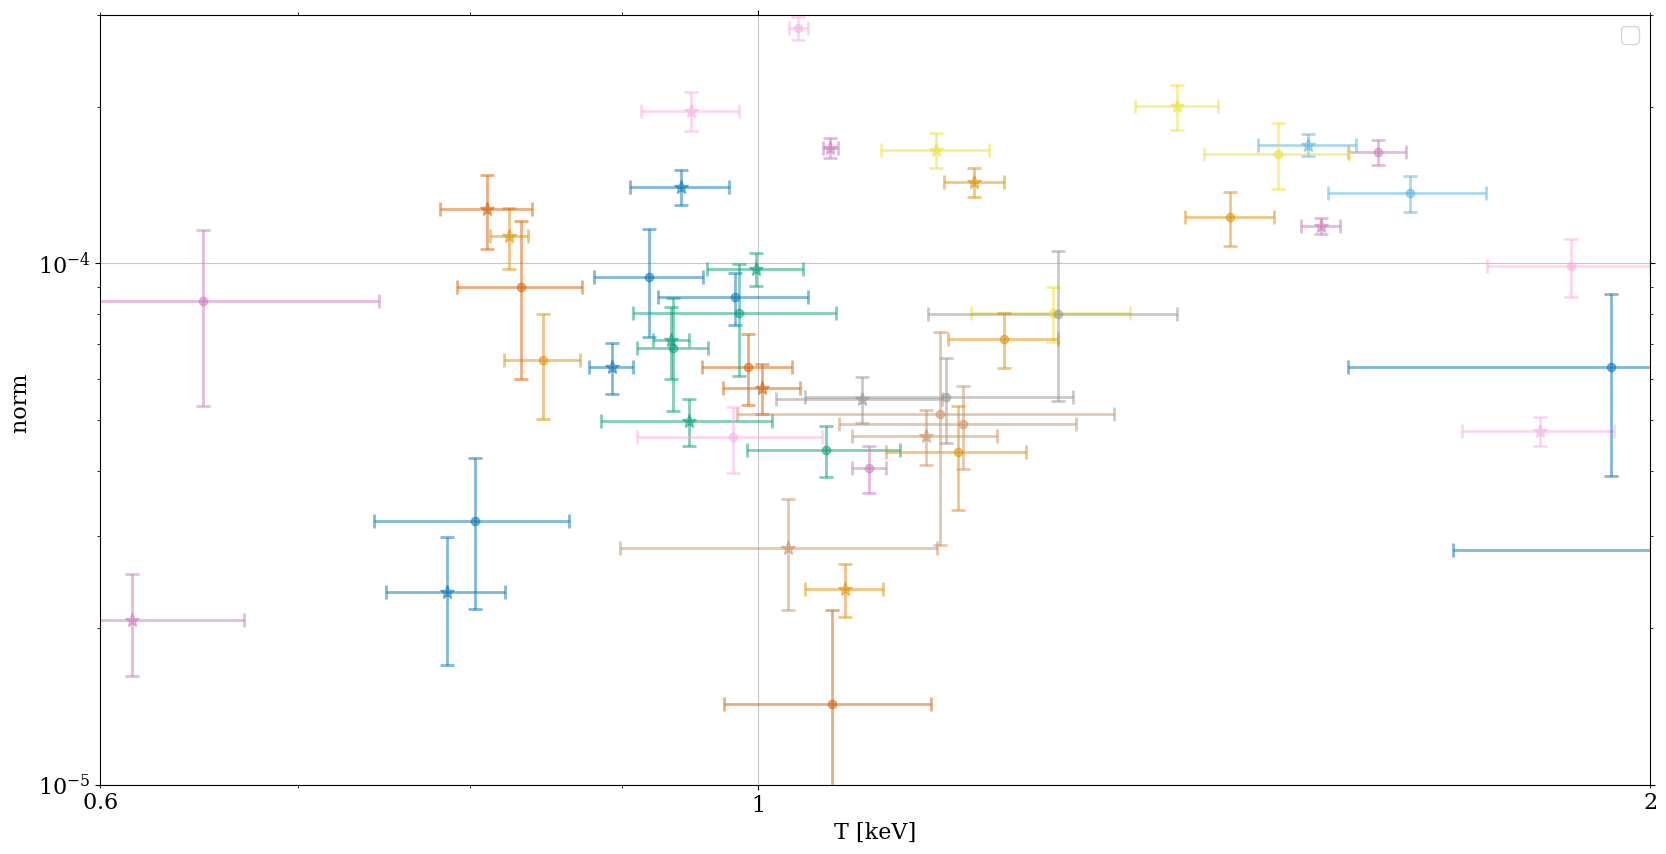

In [118]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

cb = sns.color_palette("colorblind").as_hex()
# set paths
rootdir = '/Users/eusracenorth/Documents/work/XGAP-ABUN/alldata'
savepath = f'{rootdir}/figs/T_distribution'
datapath = f'{rootdir}/dats'
os.makedirs(f'{savepath}', exist_ok=True)

# make plot
fig, ax = plt.subplots(figsize=(20, 10))

# load data
file_1T_xspec = f'{datapath}/R500-01_1T_xspec.csv'
file_1T_spex = f'{datapath}/R500-01_1T_spex.csv'
df_1T_xspec = pd.read_csv(file_1T_xspec)
df_1T_spex = pd.read_csv(file_1T_spex)

# read in redshifts
file_reds = f'{datapath}/basics_allsources.csv'
df_reds = pd.read_csv(file_reds)

# filter xspec and spex
df_1T_spex = df_1T_spex[df_1T_spex['n-value'] != 0]
df_1T_xspec = df_1T_xspec[df_1T_xspec['ID'].isin(df_1T_spex['ID'])]

df_reds = df_reds[np.isin(df_reds['ID'], df_1T_spex['ID'])]

# extract error values
yerrhi_xspec = np.where(df_1T_xspec['T-errhi'] < 5, df_1T_xspec['T-errhi'], 0)
xerrlo_xspec = np.where(df_1T_xspec['n-errlo'] < 5, df_1T_xspec['n-errlo'], 0)
xerrhi_xspec = np.where(df_1T_xspec['n-errhi'] < 5, df_1T_xspec['n-errhi'], 0)

yerrhi_spex = np.where(df_1T_spex['T-errhi'] < 5, df_1T_spex['T-errhi'], 0)


# plot data
for i in range(len(df_1T_spex)):
    # print(df_1T_xspec['T-value'].iloc[i])
    # print(xerrlo_xspec[i],df_1T_xspec['T-errlo'].iloc[i])
    if np.sum(df_reds['ID'] == df_1T_spex['ID'].iloc[i]) > 0:
        reds  = float(df_reds['z'][df_reds['ID'] == df_1T_spex['ID'].iloc[i]])
        xerrlo_spex = norm_spex2xspec(reds, df_1T_spex['n-errlo'].iloc[i])
        xerrhi_spex = norm_spex2xspec(reds, df_1T_spex['n-errhi'].iloc[i])
        n_spex = norm_spex2xspec(reds, df_1T_spex['n-value'].iloc[i])

        plt.errorbar(
            df_1T_xspec['T-value'].iloc[i],
            df_1T_xspec['n-value'].iloc[i],
            xerr=df_1T_xspec['T-errlo'].iloc[i],
            yerr=xerrlo_xspec[i],  # Fixing the xerr format
            capsize=5,
            capthick=2,
            fmt='o',
            alpha=0.5,
            c = cb[int(i%len(cb))]
        )

        plt.errorbar(
            df_1T_spex['T-value'].iloc[i],
            n_spex,
            xerr=df_1T_spex['T-errlo'].iloc[i],
            yerr=xerrlo_spex,  # Fixing the xerr format
            capsize=5,
            capthick=2,
            fmt='*',
            markersize = 10,
            alpha=0.5,
            c = cb[int(i%len(cb))]
        )

plt.legend()
plt.xlim(0.6, 2)
plt.ylim(1e-5, 3e-4)

plt.xlabel('T [keV]')
plt.ylabel('norm ')

plt.xscale('log')
plt.yscale('log')

plt.savefig(f'{savepath}/your_plot_name.png')
plt.show()


## plot Z vs n

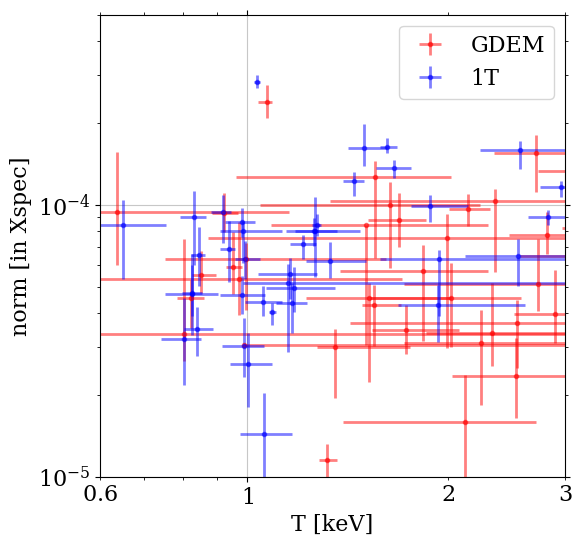

In [63]:
fig, ax = plt.subplots(figsize = (6,6))


x = np.arange(len(df_1T))
xerrlo = df_Tavg['Tavg'] - df_Tavg['Tavg_lo']
xerrhi = df_Tavg['Tavg_hi'] - df_Tavg['Tavg']
yerrlo = np.where(df_GD['n-errlo']>0, df_GD['n-errlo'], 0)
yerrhi = np.where(df_GD['n-errhi']>0, df_GD['n-errhi'], 0)
yerrlo = np.where(yerrlo<5, yerrlo, 0)
yerrhi = np.where(yerrhi<5, yerrhi, 0)
xerrlo = np.where(xerrlo>0, xerrlo, 0)
xerrhi = np.where(xerrhi>0, xerrhi, 0)
plt.errorbar(df_Tavg['Tavg'], df_GD['n-value'], xerr = (xerrlo, xerrhi), yerr = [yerrlo, yerrhi], label = 'GDEM', c = 'r', fmt = '.', alpha = 0.5)
yerrlo = np.where(df_1T['n-errlo']>0, df_1T['n-errlo'], 0)
yerrhi = np.where(df_1T['n-errhi']>0, df_1T['n-errhi'], 0)

xerrlo = np.where(df_1T['T-errlo']>0, df_1T['T-errlo'], 0)
xerrhi = np.where(df_1T['T-errhi']>0, df_1T['T-errhi'], 0)
plt.errorbar(df_1T['T-value'], df_1T['n-value'], xerr = (xerrlo, xerrhi), yerr = (df_1T['n-errlo'], yerrhi), label = '1T', c = 'b', fmt = '.', alpha = 0.5)
plt.legend()
plt.xlim(0.6,3)
plt.ylim(1e-5,5e-4)
plt.xlabel('T [keV]')
plt.ylabel('norm [in Xspec]')
plt.xscale('log')
plt.yscale('log')

# 2 plot abundance according to grouping by T

In [ ]:
yerrlo = np.where(df_GD['n-errlo']<5e-4, df_GD['n-errlo'], 0)
yerrhi = np.where(df_GD['n-errhi']<5e-4, df_GD['n-errhi'], 0)

# 3 calculate the grouping variance

# 4 plot with Francois data

27
25
0.15556997198119182 0.05365075761413399
0.430584025 0.3342843751540671 1.2511789024629765 0.3192478885866872
0.8386530049025357 0.2948081817187522
0.8091457692307693 0.366188947132778 3.0214724429305115 0.7374583535249861
[0.5 0.6 0.7 0.8 0.9 1.  2.  3.  4.  5.  6.  7. ]


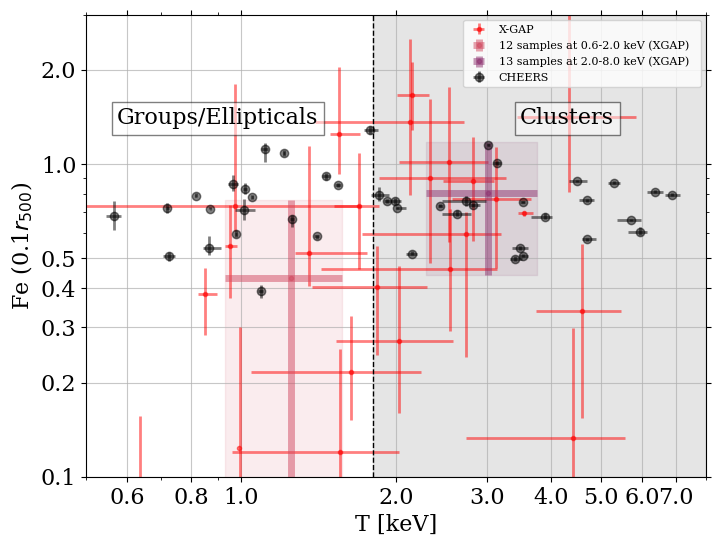

In [55]:
import seaborn as sns
cb = sns.color_palette("flare").as_hex()
cb = [cb[2],cb[4]]
# read Francois data
fran_path = f'{rootdir}/../Francois'
df_fr = pd.read_csv(f'{fran_path}/Results_CHEERS_3T_0.1r500_SPEX3.txt', delim_whitespace=True)


#### group data ####
# exclude bad fit
fil1 = abs(df_GD['cstat']/df_GD['dof'] - 1)<0.3

# exclude flared sources
flared = ['SDSSTG22635', 'SDSSTG1695', 'SDSSTG15776', 'SDSSTG35976', 'SDSSTG4047', 'SDSSTG3513']
fil2 = fil1 & (~np.isin(df_GD['reg'], flared))
print(np.sum(fil2))

# exclude insane values
fil3 = fil2 & (df_GD['Z-value'] < 2)
print(np.sum(fil3))

### plot Z vs T
fig, ax = plt.subplots(figsize = (8,6))
yerrlo = df_Tavg['Tavg'] - df_Tavg['Tavg_lo']
yerrlo = np.where(yerrlo<0, 0, yerrlo)
yerrhi = df_Tavg['Tavg_hi'] - df_Tavg['Tavg']
# yerrhi = np.where(yerrhi<5, 0, yerrhi)

x = np.arange(len(df_1T))
yerrhi = np.where(yerrhi<5, yerrhi, 0)
xerrlo = np.where(df_GD['Z-errlo']<5, df_GD['Z-errlo'], 0)
xerrhi = np.where(df_GD['Z-errhi']<5, df_GD['Z-errhi'], 0)
plt.errorbar(df_Tavg['Tavg'][fil3], df_GD['Z-value'][fil3],  xerr = [yerrlo[fil3], yerrhi[fil3]], yerr = (xerrlo[fil3], xerrhi[fil3]), label = 'X-GAP', c = 'r', fmt = '.', alpha = 0.5)

# yerrhi = np.where(yerrhi<5, 0, yerrhi)

temp_grp_lo = [0.6, 2.0]
temp_grp_hi = [2.0, 8.0]
Twei_lst = []
Tvar_lst = []
Zwei_lst = []
Zvar_lst = []

for i in range(len(temp_grp_lo)):
    fil = fil3 & (df_Tavg['Tavg'] < temp_grp_hi[i]) & (df_Tavg['Tavg'] > temp_grp_lo[i])
    yerrlo = df_Tavg['Tavg'][fil] - df_Tavg['Tavg_lo'][fil]
    yerrhi = df_Tavg['Tavg_hi'][fil] - df_Tavg['Tavg'][fil]
    yerr = np.min(np.array([abs(yerrlo), abs(yerrhi)]), axis = 0)
    xerr = np.min(np.array([abs(df_GD['Z-errlo'][fil]), abs(df_GD['Z-errhi'][fil])]), axis = 0)

    y_wei = np.mean(df_Tavg['Tavg'][fil])
    x_wei = np.mean(df_GD['Z-value'][fil])
    # y_wei = np.sum(df_Tavg['Tavg'][fil] * 1/yerr**2) / np.sum(1/yerr**2)
    # x_wei = np.sum(df_GD['Z-value'][fil] * 1/xerr**2) / np.sum(1/xerr**2)
    yerr = np.where(yerr<5, yerr, 0)
    xerr = np.where(xerr<10, xerr, 0)
    # print(np.mean(yerr)**2)
    print(np.sum((df_Tavg['Tavg'][fil] - y_wei)**2)/(np.sum(fil)-1) , np.mean(yerr)**2)
    y_var = np.sqrt(np.sum((df_Tavg['Tavg'][fil] - y_wei)**2)/(np.sum(fil)-1) - np.mean(yerr)**2)
    x_var = np.sqrt(np.sum((df_GD['Z-value'][fil] - x_wei)**2)/(np.sum(fil)-1) - np.mean(xerr)**2)
    print(x_wei, x_var, y_wei, y_var)
    Twei_lst.append(y_wei); Tvar_lst.append(y_var); Zwei_lst.append(x_wei), Zvar_lst.append(x_var)
    plt.fill_between([y_wei - y_var, y_wei + y_var], y1 = x_wei - x_var, y2 = x_wei + x_var, color = cb[i], alpha = 0.1)
    plt.errorbar(y_wei, x_wei, xerr = y_var, yerr = x_var, c = cb[i], fmt = '.', alpha = 0.5, linewidth = 5, label = f'{np.sum(fil)} samples at {temp_grp_lo[i]}-{temp_grp_hi[i]} keV (XGAP)  ') 



#### Frans ####
plt.errorbar(df_fr['kT'], df_fr['Fe'], xerr = (abs(df_fr['-err']), df_fr['+err']), yerr = (abs(df_fr['-err.1']), df_fr['+err.1']), label = 'CHEERS', c = 'k', fmt = 'o', alpha = 0.5)
plt.legend(fontsize= 8)
xrange = (0.5, 8)
yrange = (0.1, 3)
plt.xlim(xrange[0], xrange[1])
plt.ylim(yrange[0], yrange[1])
plt.xlabel('T [keV]')
plt.ylabel('Fe (0.1$r_{500}$)')
plt.xscale('log')
plt.yscale('log')
plt.axvline(1.8, linestyle = '--', color = 'k', linewidth = 1)

plt.text(0.05,0.8, f'Groups/Ellipticals',
bbox=dict(facecolor='white', alpha=0.5),horizontalalignment='left',
verticalalignment='top', transform=ax.transAxes)

plt.text(0.7,0.8, f'Clusters',
bbox=dict(facecolor='white', alpha=0.5),horizontalalignment='left',
verticalalignment='top', transform=ax.transAxes)
xtick = np.round(np.append(np.arange(0.6, 1, 0.2), np.arange(1,8,1)), decimals=1)
ytick = np.round(np.append(np.arange(0.1, 0.6, 0.1), np.arange(1,3,1)), decimals = 1)
plt.xticks(xtick, labels = [f'{ele}' for ele in xtick])
plt.yticks(ytick, labels = [f'{ele}' for ele in ytick])

plt.fill_betweenx([0.1, 3], 1.8, 8, color = 'k', alpha = 0.1)
# plt.savefig()

print(np.append(np.arange(0.5, 1, 0.1), np.arange(1,8,1)))

4.1 try the intrinsic error

27
25
[0.5 0.6 0.7 0.8 0.9 1.  2.  3.  4.  5.  6.  7. ]


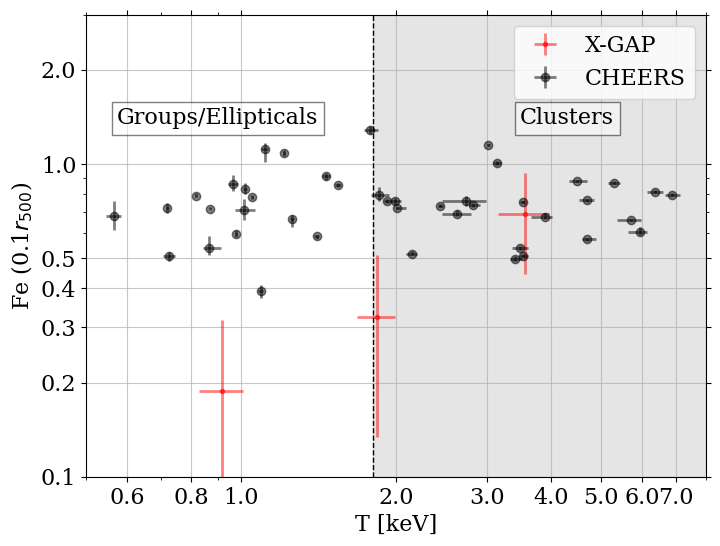

In [9]:
# read Francois data
fran_path = f'{rootdir}/../Francois'
df_fr = pd.read_csv(f'{fran_path}/Results_CHEERS_3T_0.1r500_SPEX3.txt', delim_whitespace=True)

### plot Z vs T
fig, ax = plt.subplots(figsize = (8,6))
# exclude bad fit
fil1 = abs(df_GD['cstat']/df_GD['dof'] - 1)<0.3

# exclude flared sources
flared = ['SDSSTG22635', 'SDSSTG1695', 'SDSSTG15776', 'SDSSTG35976', 'SDSSTG4047', 'SDSSTG3513']
fil2 = fil1 & (~np.isin(df_GD['reg'], flared))
print(np.sum(fil2))

# exclude insane values
fil3 = fil2 & (df_GD['Z-value'] < 2)
print(np.sum(fil3))

# yerrhi = np.where(yerrhi<5, 0, yerrhi)

temp_grp_lo = [0.6, 1.5, 3.0]
temp_grp_hi = [1.5, 3.0, 8.0]
Twei_lst = []
Tvar_lst = []
Zwei_lst = []
Zvar_lst = []

for i in range(len(temp_grp_lo)):
    fil = fil3 & (df_Tavg['Tavg'] < temp_grp_hi[i]) & (df_Tavg['Tavg'] > temp_grp_lo[i])
    yerrlo = df_Tavg['Tavg'][fil] - df_Tavg['Tavg_lo'][fil]
    yerrhi = df_Tavg['Tavg_hi'][fil] - df_Tavg['Tavg'][fil]
    yerr = np.mean(np.array([abs(yerrlo), abs(yerrhi)]), axis = 0)
    xerr = np.mean(np.array([abs(df_GD['Z-errlo'][fil]), abs(df_GD['Z-errhi'][fil])]), axis = 0)

    y_wei = np.sum(df_Tavg['Tavg'][fil] * 1/yerr**2) / np.sum(1/yerr**2)
    x_wei = np.sum(df_GD['Z-value'][fil] * 1/xerr**2) / np.sum(1/xerr**2)
    y_var = np.sqrt(np.sum((df_Tavg['Tavg'][fil] - y_wei)**2))/(np.sum(fil)-1)
    x_var = np.sqrt(np.sum((df_GD['Z-value'][fil] - x_wei)**2))/(np.sum(fil)-1) 

    Twei_lst.append(y_wei); Tvar_lst.append(y_var); Zwei_lst.append(x_wei), Zvar_lst.append(x_var)

plt.errorbar(Twei_lst, Zwei_lst, xerr = Tvar_lst, yerr = Zvar_lst, label = 'X-GAP', c = 'r', fmt = '.', alpha = 0.5)


plt.errorbar(df_fr['kT'], df_fr['Fe'], xerr = (abs(df_fr['-err']), df_fr['+err']), yerr = (abs(df_fr['-err.1']), df_fr['+err.1']), label = 'CHEERS', c = 'k', fmt = 'o', alpha = 0.5)
plt.legend()
xrange = (0.5, 8)
yrange = (0.1, 3)
plt.xlim(xrange[0], xrange[1])
plt.ylim(yrange[0], yrange[1])
plt.xlabel('T [keV]')
plt.ylabel('Fe (0.1$r_{500}$)')
plt.xscale('log')
plt.yscale('log')
plt.axvline(1.8, linestyle = '--', color = 'k', linewidth = 1)

plt.text(0.05,0.8, f'Groups/Ellipticals',
bbox=dict(facecolor='white', alpha=0.5),horizontalalignment='left',
verticalalignment='top', transform=ax.transAxes)

plt.text(0.7,0.8, f'Clusters',
bbox=dict(facecolor='white', alpha=0.5),horizontalalignment='left',
verticalalignment='top', transform=ax.transAxes)
xtick = np.round(np.append(np.arange(0.6, 1, 0.2), np.arange(1,8,1)), decimals=1)
ytick = np.round(np.append(np.arange(0.1, 0.6, 0.1), np.arange(1,3,1)), decimals = 1)
plt.xticks(xtick, labels = [f'{ele}' for ele in xtick])
plt.yticks(ytick, labels = [f'{ele}' for ele in ytick])

plt.fill_betweenx([0.1, 3], 1.8, 8, color = 'k', alpha = 0.1)
# plt.savefig()

print(np.append(np.arange(0.5, 1, 0.1), np.arange(1,8,1)))